Explained Variance by Components: [0.60069523 0.27312448 0.08600088 0.01063269 0.00966495]
Feature Importances:
                 feature  importance
5               Absences    0.852226
7        ParentalSupport    0.031236
4        StudyTimeWeekly    0.029142
12       StudyTimePerDay    0.027668
6               Tutoring    0.013232
13  ParentalSupportLevel    0.008400
8        Extracurricular    0.008130
9                 Sports    0.007449
0                    Age    0.006067
2              Ethnicity    0.004708
3      ParentalEducation    0.003931
10                 Music    0.003701
1                 Gender    0.002399
11          Volunteering    0.001712


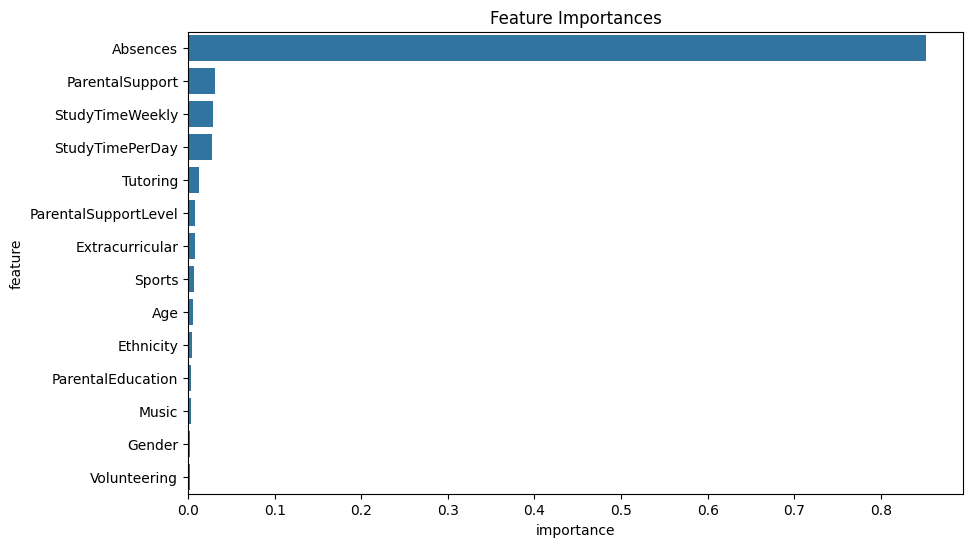


Mean Squared Error with optimized features: 0.0708713710025177

Predicted GPA for the example data with optimized features: 3.0914296820758818


In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
file_path = '/content/Student_performance_data _.csv'  # Update the path accordingly
df = pd.read_csv(file_path)

# Feature Engineering
df['StudyTimePerDay'] = df['StudyTimeWeekly'] / 7
df['ParentalSupportLevel'] = df['ParentalEducation'] * df['ParentalSupport']

# Prepare features and target variable
X = df[['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly', 'Absences',
        'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering',
        'StudyTimePerDay', 'ParentalSupportLevel']]
y = df['GPA']

# Step 2a: Feature Selection using PCA
pca = PCA(n_components=5)  # Choose the number of components
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by Components: {explained_variance}")

# Step 2b: Feature Selection using Feature Importance from RandomForest
model = RandomForestRegressor()
model.fit(X, y)
importances = model.feature_importances_
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
print(f"Feature Importances:\n{feature_importances}")

# Visualization of Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

# Step 3: Optimize Feature Sets for Improved Model Performance
# Using top 5 important features
top_features = feature_importances['feature'][:5].tolist()
X_optimized = df[top_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_optimized, y, test_size=0.2, random_state=42)

# Train the model with optimized features
optimized_model = RandomForestRegressor()
optimized_model.fit(X_train, y_train)

# Make predictions
y_pred = optimized_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error with optimized features: {mse}")

# Example prediction with optimized features
example_data = pd.DataFrame({
    'Age': [17],
    'ParentalEducation': [2],
    'StudyTimeWeekly': [10],
    'Absences': [5],
    'Tutoring': [1],
    'ParentalSupport': [3],
    'Extracurricular': [1],
    'Sports': [0],
    'Music': [1],
    'Volunteering': [0],
    'StudyTimePerDay': [10/7],
    'ParentalSupportLevel': [2*3]
})

example_data_optimized = example_data[top_features]
predicted_gpa = optimized_model.predict(example_data_optimized)
print(f"\nPredicted GPA for the example data with optimized features: {predicted_gpa[0]}")
